In [2]:
import matplotlib.pyplot as plt 

import scipy.ndimage.filters

import skimage.color

from PIL import Image
from PIL import ImageFilter

import numpy as np

from skimage import io, color, feature,filters,morphology, draw

import math


/usr/lib/python2.7/dist-packages/pkg_resources/__init__.py:1224: UserWarning: /home/brendan/.python-eggs is writable by group/others and vulnerable to attack when used with get_resource_filename. Consider a more secure location (set with .set_extraction_path or the PYTHON_EGG_CACHE environment variable).
  warnings.warn(msg, UserWarning)


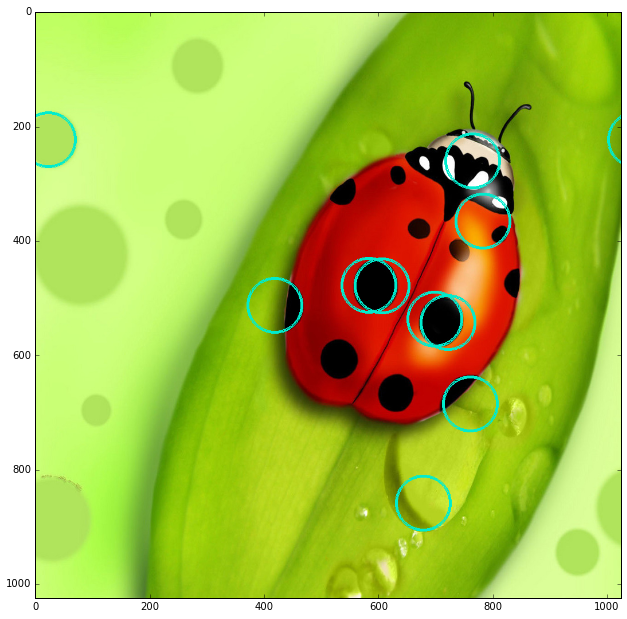

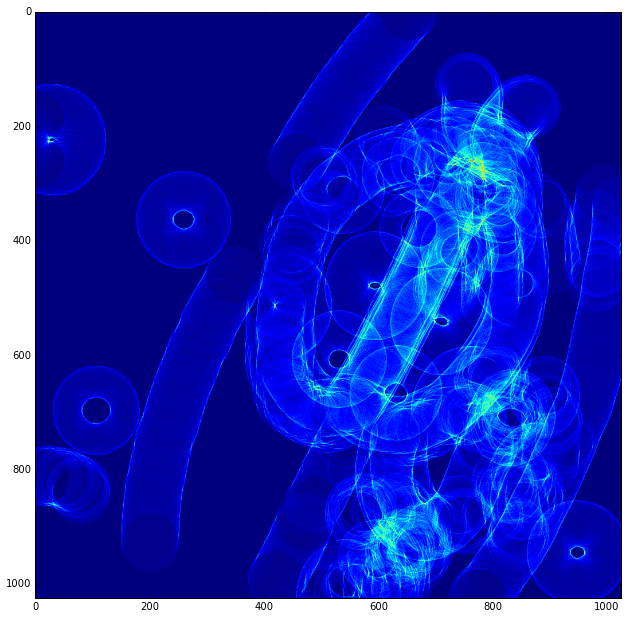

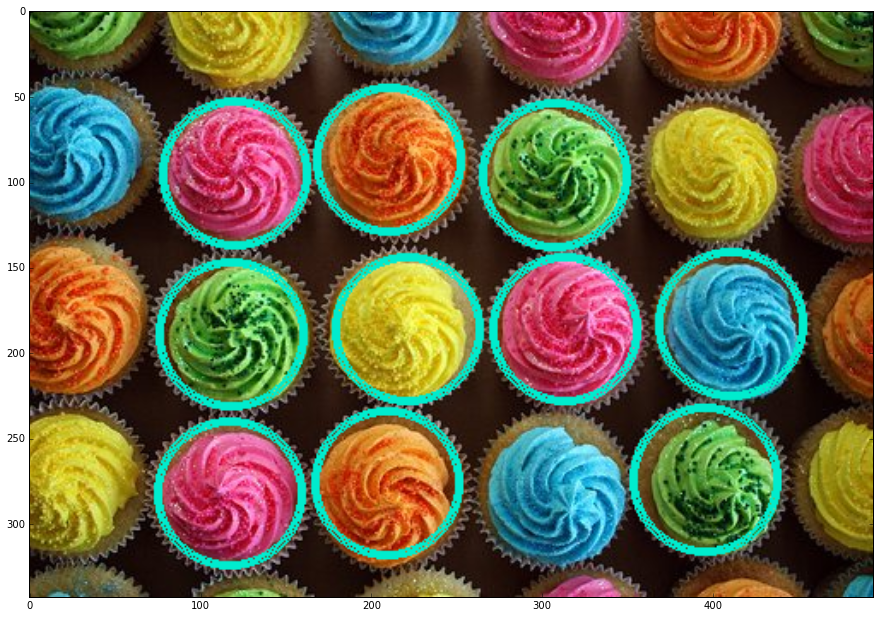

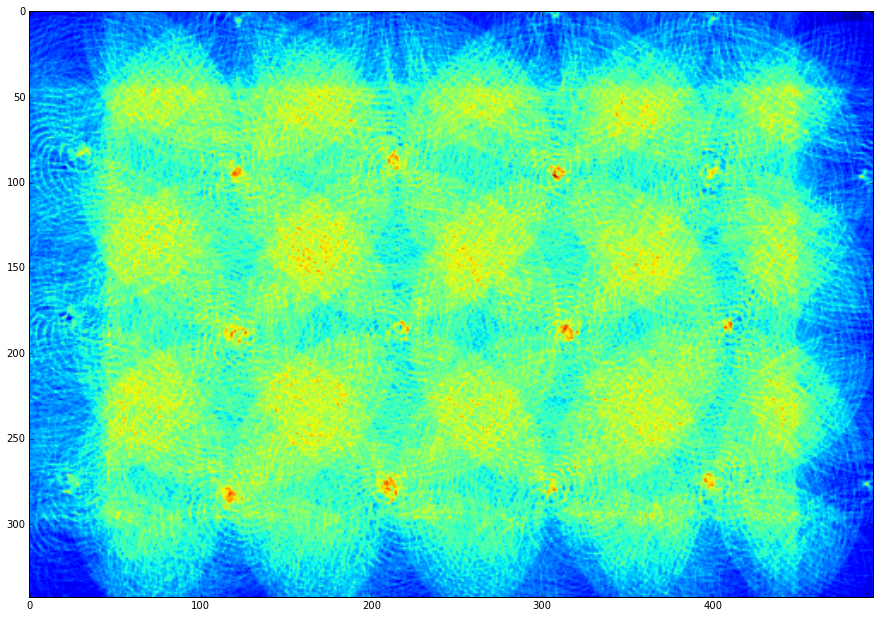

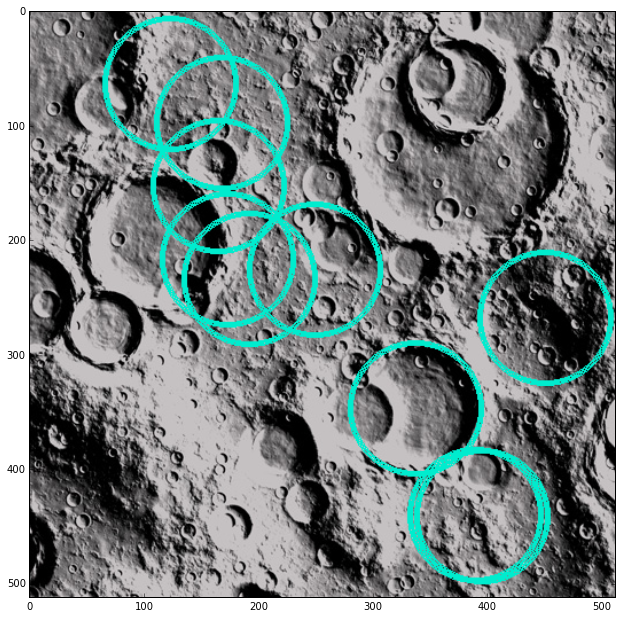

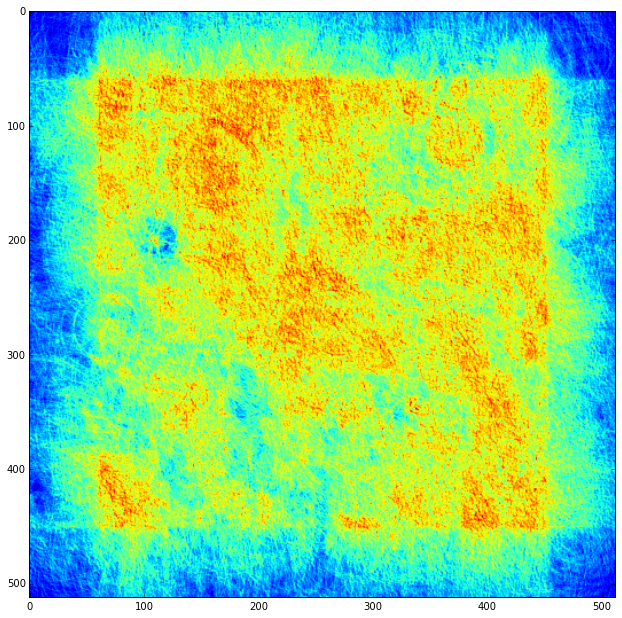

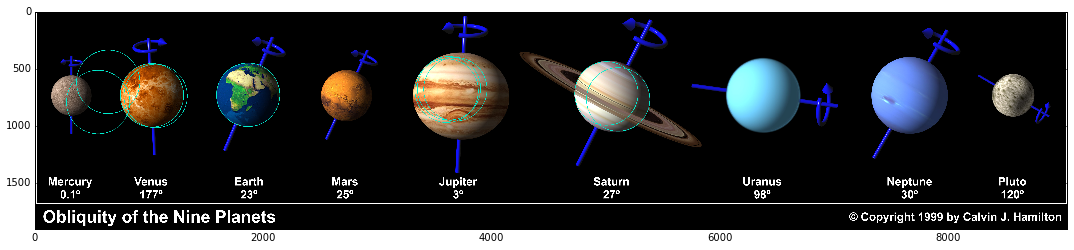

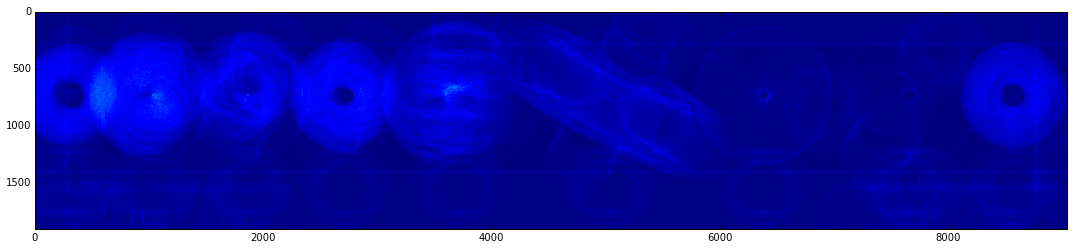

In [110]:
def detectCircles(im, radius, usegradient):
    max_x=im.shape[0]
    min_x=0
    max_y=im.shape[1]
    min_y=0
    edge = np.where(im == True)
    H = np.zeros(im.shape)
    for e in range(len(edge[0])):
        y, x = skimage.draw.circle_perimeter( edge[1][e], edge[0][e], radius)
        circ=np.array([x,y])
        in_up_x=circ[0]<max_x
        in_low_x=circ[0]>=min_x
        in_up_y=circ[1]<max_y
        in_low_y=circ[1]>=min_x
        meets_all=in_up_x & in_low_x & in_up_y & in_low_y
        meets_all=np.array([meets_all,]*2)
        circ=circ[meets_all]
        circ=np.reshape(circ,(2,len(circ)/2))
        x=circ[0]
        y=circ[1]
        H[x, y] +=1
        
    return H

def huff_and_puff(img_arr,radius=50,plot_circles=True,plot_huff=True):
    # Preprocessing

    # convert to greyscale
    image=skimage.color.rgb2grey(img_arr)

    # Edge detect
    canny_map=feature.canny(image, low_threshold = 0.025, high_threshold= .15)
    # r, t, H = hough_transform(canny_map)


    # get circles
    circles = detectCircles(canny_map,radius, 3)
    stuff=skimage.feature.peak_local_max(circles,min_distance=20,indices=True,num_peaks=10)
    stuff_t=np.transpose(stuff)

    centers_x=stuff_t[0]
    centers_y=stuff_t[1]

    # Draw teh found circles
    for j in range(len(stuff_t[0])):
        for k in range(radius-5,radius):
            points= skimage.draw.circle_perimeter(centers_x[j], centers_y[j], k)
            for i in range(len(points[0])):
                x=points[0][i]
                y=points[1][i]
                img_arr[x][y]=np.array([0,20,50.0])
                
    if plot_circles:
        f=plt.figure()
        f.set_size_inches(18.5, 10.5)
        plt.imshow(img_arr)
        
    if plot_huff:
        f=plt.figure()
        f.set_size_inches(18.5, 10.5)
        plt.imshow(circles)
        # plt.plot(stuff_t[1],stuff_t[0],linestyle="",marker="o")
    


# uniq=np.unique(circles,return_counts=True,return_index=True)
# #0 is value
# #1 is indices
# #2 is count
# big_i=uniq[1][uniq[0]>27]
# print(big_i)
# incr_map=np.reshape(np.arange(image.shape[0]*image.shape[1]),(image.shape[0],image.shape[1]))
# print(np.where(incr_map==big_i))


# draw circles on origional image 

%matplotlib inline
ladybug = np.asarray(Image.open("Images/Q2/ladybug.jpg"),dtype=np.float64)/255.0 #radius=50
colorful = np.asarray(Image.open("Images/Q2/colorful3.jpg"),dtype=np.float64)/255.0 #radius=45
moon = np.asarray(Image.open("Images/Q2/MoonCraters.jpg"),dtype=np.float64)/255.0 #radius=45
planets = np.asarray(Image.open("Images/Q2/Planets.jpeg"),dtype=np.float64)/255.0 #radius=45

huff_and_puff(ladybug,radius=50)
huff_and_puff(colorful,radius=45)
huff_and_puff(moon,radius=60)
huff_and_puff(planets,radius=280)

In [54]:
canny_map[1][1]


array([False, False, False, ..., False, False, False], dtype=bool)